In [2]:
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [3]:
numberOfFeatures = 50
attributesInput = layers.Input(shape=(numberOfFeatures,))
attributes = layers.Dense(4 * 4 * numberOfFeatures)(attributesInput)
attributes = layers.Reshape([4, 4, numberOfFeatures])(attributes)

In [4]:
randomVectorSize = 100
randomNoiseInput = layers.Input(shape=(randomVectorSize,))
randomNoise = layers.Dense(4 * 4 * 256)(randomNoiseInput)
# randomNoise = layers.LeakyReLU(alpha=0.2)(randomNoise)
randomNoise = layers.Reshape([4, 4, 256])(randomNoise)

In [5]:
merged = layers.Concatenate()([randomNoise, attributes])
generator = layers.BatchNormalization()(merged)
# 4x4 => 8x8
generator = layers.Conv2DTranspose(128, (5,5), (2,2), padding="same", activation="selu")(generator)
generator = layers.BatchNormalization()(generator)
# generator = layers.LeakyReLU(alpha=0.2)(generator)
# 8x8 => 16x16
generator = layers.Conv2DTranspose(128, (5,5), (2,2), padding="same", activation="selu")(generator)
generator = layers.BatchNormalization()(generator)
# generator = layers.LeakyReLU(alpha=0.2)(generator)
# 16x16 => 32x32
generator = layers.Conv2DTranspose(128, (5,5), (2,2), padding="same", activation="selu")(generator)
generator = layers.BatchNormalization()(generator)
# generator = layers.LeakyReLU(alpha=0.2)(generator)
# 32x32 => 64x64
generator = layers.Conv2DTranspose(128, (5,5), (2,2), padding="same", activation="selu")(generator)
generator = layers.BatchNormalization()(generator)
# generator = layers.LeakyReLU(alpha=0.2)(generator)
# 64x64 => 128x128
# ------------------------------ This ------------------------------
generator = layers.Conv2DTranspose(3, (5,5), (2,2), padding="same", activation="selu")(generator)
# ---------------------------- or this -----------------------------
# generator = layers.Conv2DTranspose(128, (5,5), (2,2), padding="same", activation="selu")(generator)
# generator = layers.BatchNormalization()(generator)
# # generator = layers.LeakyReLU(alpha=0.2)(generator)

# generator = layers.Conv2D(3, (7,7), activation='tanh', padding='same')(generator)
# ---------------------------- or this -----------------------------

generatorModel = keras.models.Model([attributesInput, randomNoiseInput], generator)


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 4096)         413696      input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 800)          40800       input_1[0][0]                    
_______________________________________________________________________________________

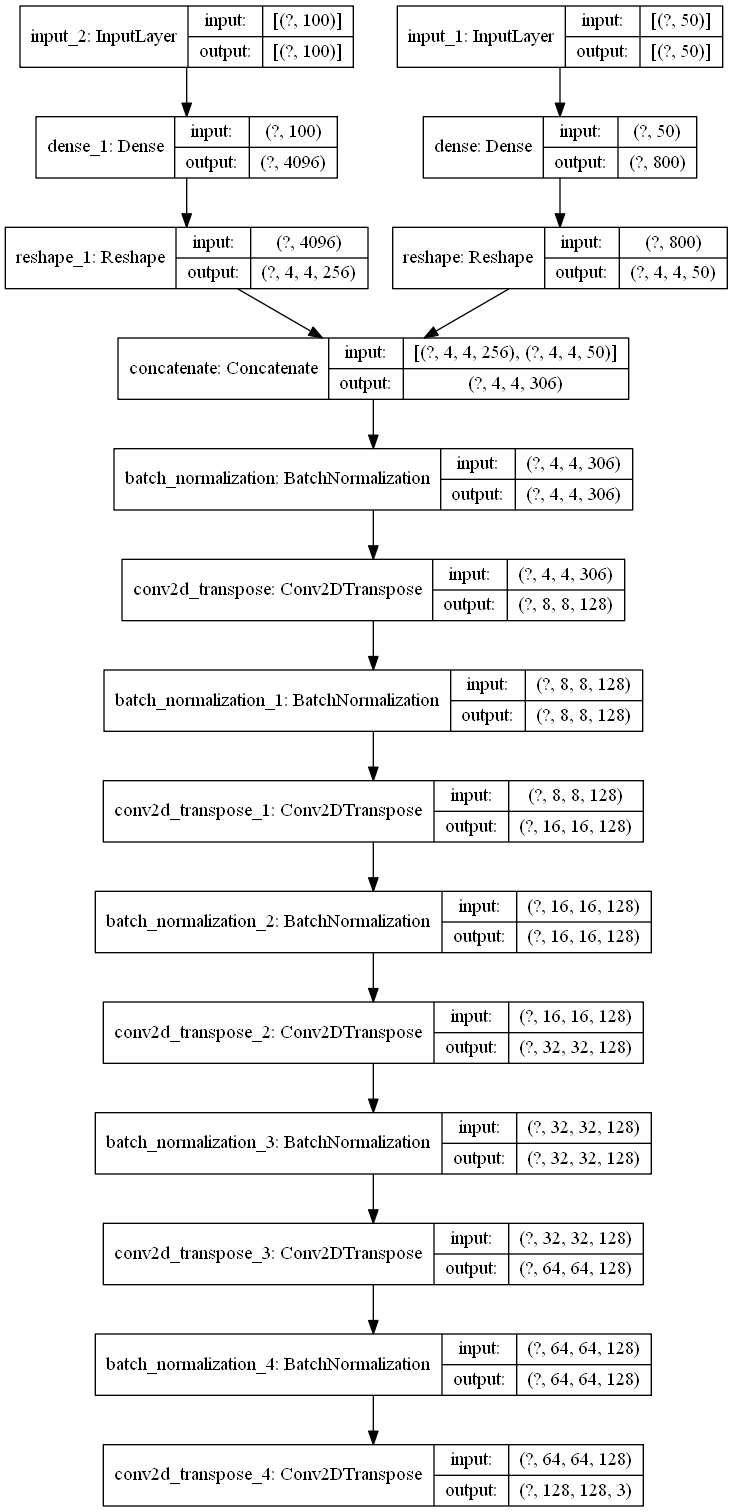

In [7]:
generatorModel.summary()
plot_model(generatorModel, to_file='generator.png', show_shapes=True, show_layer_names=True)